In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import root

from py.turings import c0, c1, c2
from py.params import setParams
from py.analysis import computeFPs, checkFixPtsStability#, violationType, a_jkValues, lmbd

In [2]:
def p(x, c_2, c_1, c_0):
    return x**3 + c_2*x**2 + c_1*x + c_0


def deriv_p(x, c_2, c_1, c_0):
    return 3*x**2 + 2*c_2*x + c_1

In [40]:
ee = 0.3
ii = -0.8

params={'I_e': ee, 'I_i': ii, 'b': 0.25, 'end_t': 8*1000, 'tau_a': 600, 'mu_a': 1, 'beta_a': 9.5}

params = setParams(params)
fps = computeFPs(params)
stab = checkFixPtsStability(fps, params)
fp = fps[-1]
fp

array([0.97066608, 0.99945731])

root is -0.00061
c0=0.0003, c1=0.5697, c2=1.5204
c1c2-c0=0.8658, with c1=0.5697


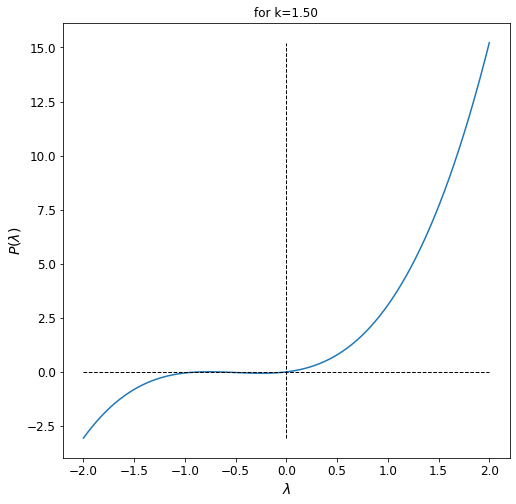

root is -0.00064
c0=0.0004, c1=0.5872, c2=1.5467
c1c2-c0=0.9079, with c1=0.5872


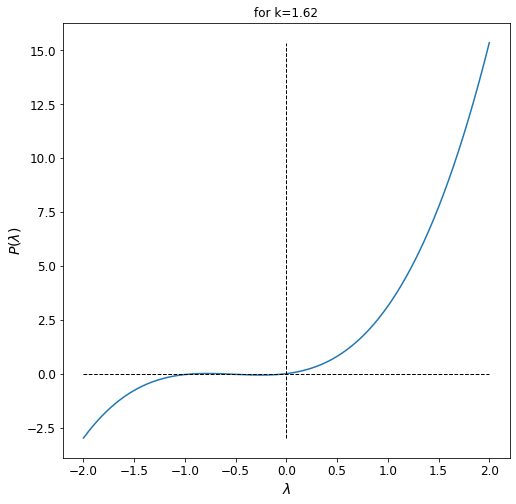

root is -0.00067
c0=0.0004, c1=0.6027, c2=1.5698
c1c2-c0=0.9457, with c1=0.6027


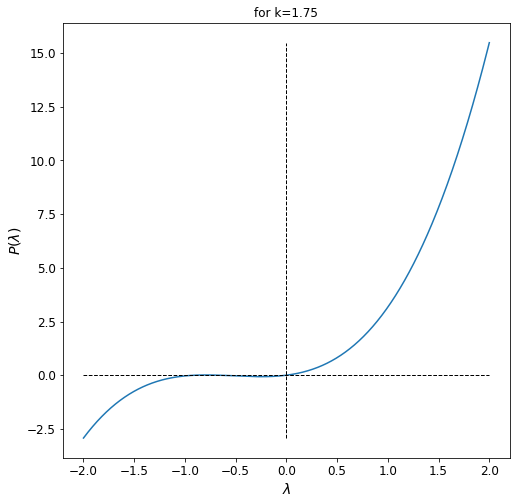

root is -0.00069
c0=0.0004, c1=0.6160, c2=1.5898
c1c2-c0=0.9790, with c1=0.6160


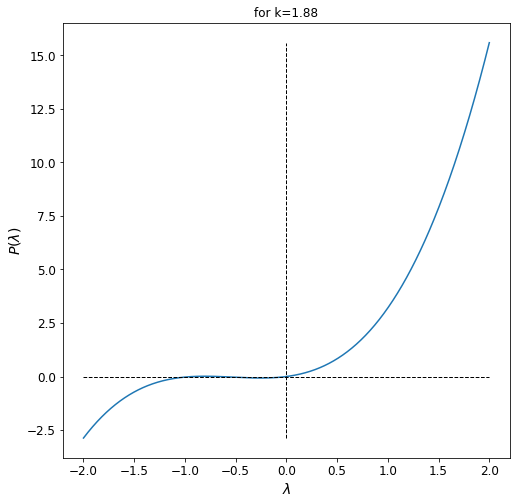

root is -0.00071
c0=0.0004, c1=0.6273, c2=1.6067
c1c2-c0=1.0075, with c1=0.6273


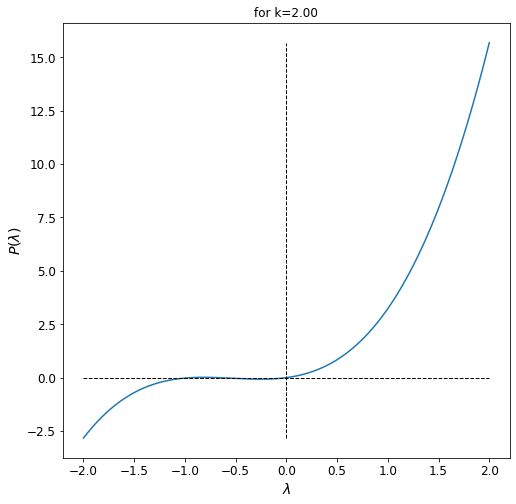

In [41]:
x = np.linspace(-2,2,801)
zero_line = np.linspace(0,0,len(x))

#use property c0=0 ('has zero-eigenvalue' - Curtu & Ermentrout 2004)
k=np.linspace(1.5,2,5)

c_2 = c2(k, fp, params)
c_1 = c1(k, fp, params)
c_0 = c0(k, fp, params)

for i in range(len(k)):
    
    zero_sol = root(p, 0, args=(c_2[i], c_1[i], c_0[i]), jac=deriv_p, method='hybr')
    
    print('root is %.5f' %zero_sol.x)
    print('c0=%.4f, c1=%.4f, c2=%.4f' %(c_0[i], c_1[i], c_2[i]))
    print('c1c2-c0=%.4f, with c1=%.4f' %(c_2[i]*c_1[i]-c_0[i], c_1[i]))
    
    zero_poly = p(x, c_2[i], c_1[i], c_0[i])
    plt.figure(figsize=(8,8))
    plt.plot(x, zero_poly)
    plt.plot(x, zero_line, c='black', lw=1, ls = 'dashed')
    plt.plot(zero_line, np.linspace(min(zero_poly), max(zero_poly), len(x)), c='black', lw=1, ls='dashed')
    plt.xlabel(r'$\lambda$', fontsize=14)
    plt.ylabel(r'$P(\lambda)$', fontsize=14)
    plt.title('for k=%.2f' %k[i])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

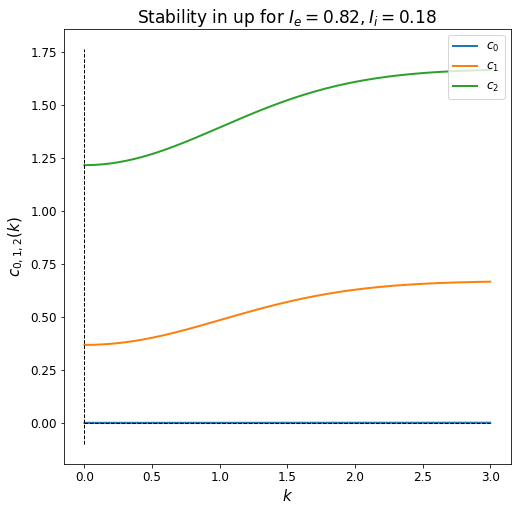

array([0.97066608, 0.99945731])

In [42]:
k=np.linspace(0,3,601)
zero_line = np.linspace(0, 0, len(k))

c_2 = c2(k, fp, params)
c_1 = c1(k, fp, params)
c_0 = c0(k, fp, params)

cs = [c_0, c_1, c_2]

plt.figure(figsize=(8,8))

for i, array in enumerate(cs):
    plt.plot(k, array, lw=2, label=r'$c_%i$' %i)

    
plt.plot(k, zero_line, c='black', lw=1, ls = 'dashed')
plt.plot(zero_line, np.linspace(min(c_0)-0.1, max(c_2)+0.1, len(k)), c='black', lw=1, ls='dashed')

plt.xlabel(r'$k$', fontsize=15)
plt.ylabel(r'$c_{0,1,2}(k)$', fontsize=15)

plt.title('Stability in up for ' + r'$I_e=0.82, I_i=0.18$', fontsize=17)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='upper right', fontsize=12)

plt.show()
fp

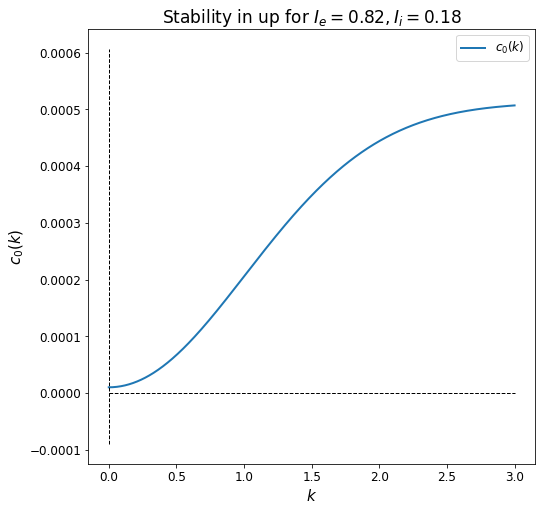

In [43]:
k=np.linspace(0,3,601)
zero_line = np.linspace(0, 0, len(k))

c_2 = c2(k, fp, params)
c_1 = c1(k, fp, params)
c_0 = c0(k, fp, params)


plt.figure(figsize=(8,8))

plt.plot(k, c_0, lw=2, label=r'$c_0(k)$')

    
plt.plot(k, zero_line, c='black', lw=1, ls = 'dashed')
plt.plot(zero_line, np.linspace(min(c_0)-0.0001, max(c_0)+0.0001, len(k)), c='black', lw=1, ls='dashed')

plt.xlabel(r'$k$', fontsize=15)
plt.ylabel(r'$c_{0}(k)$', fontsize=15)

plt.title('Stability in up for ' + r'$I_e=0.82, I_i=0.18$', fontsize=17)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='upper right', fontsize=12)

plt.show()

In [44]:
from py.turings import checkStability

In [45]:
checkStability(k, fp, params)

(0, 0, 0)